# 16 MatPlotLIb - Advanced customisation

Learn how to customise the visuals of charts using a line chart / pie chart / scatter plot. All this customisation can then be replicated on other types of charts e.g. histograms, bar charts, waterfall charts, etc.

In [69]:
# Importing libraries

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst Data
df_DA = df[df["job_title_short"] == "Data Analyst"].copy()

### Recreate scatter plot from previous section 


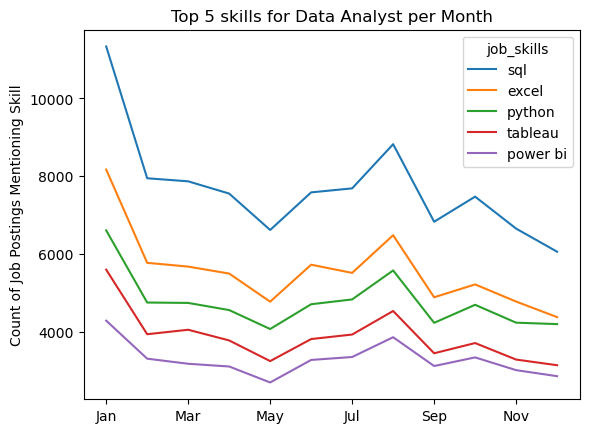

In [70]:
# create a new column for month number
df_DA["job_posted_month_no"] = df_DA["job_posted_date"].dt.month

# explode job_skills column and pivot
df_DA_explode = df_DA.explode("job_skills")
df_DA_pivot = df_DA_explode.pivot_table(index="job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0)

# sort the skills by count - add a total row after the 12 months, sort descending, remove the total row.
df_DA_pivot.loc["Total"] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc["Total"].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop("Total")

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot["job_posted_month"] = df_DA_pivot["job_posted_month_no"].apply(lambda x:pd.to_datetime(x, format="%m").strftime("%b"))
df_DA_pivot = df_DA_pivot.set_index("job_posted_month")
df_DA_pivot = df_DA_pivot.drop(columns="job_posted_month_no")

# get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind="line")

plt.title("Top 5 skills for Data Analyst per Month")
plt.xlabel("")
plt.ylabel("Count of Job Postings Mentioning Skill")
plt.show()

### Update the look of the plot

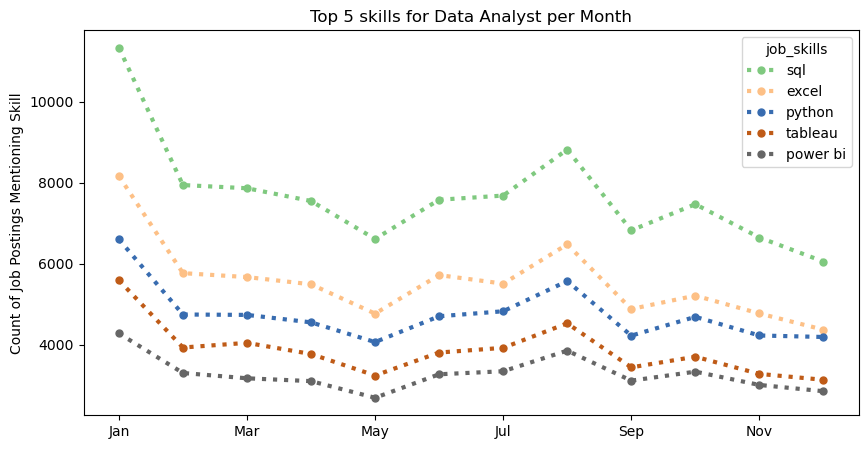

In [71]:
df_DA_pivot.iloc[:, :5].plot(
    kind="line",
    linewidth=3,
    linestyle=":", # options: "-" = line, "--" = dash line, "-." = dash+dot, ":" = dot
    colormap="Accent", #  different color maps from the cheatsheet
    marker="o", # options: "o", "*", "x", "+", ",", ...
    markersize=5,
    figsize=(10,5)
)
plt.title("Top 5 skills for Data Analyst per Month")
plt.xlabel("")
plt.ylabel("Count of Job Postings Mentioning Skill")
plt.show()

### Customising our scatter plot from section 15

In [72]:
# explode the job_skills columns
df_exploded = df_DA.explode("job_skills")

# Calculate the average salary and count of job postings per skill
skills_stat = df_exploded.groupby("job_skills").agg(
    median_salary=("salary_year_avg", "median"),
    skill_count=("job_skills", "count")
)
# limit to top 20 skills
skill_count=20

skills_stat = skills_stat.sort_values(by="skill_count", ascending=False).head(skill_count)

skills_stat

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap
10 azure
11 oracle
12 aws
13 sql server
14 go
15 flow
16 vba
17 looker
18 snowflake
19 qlik


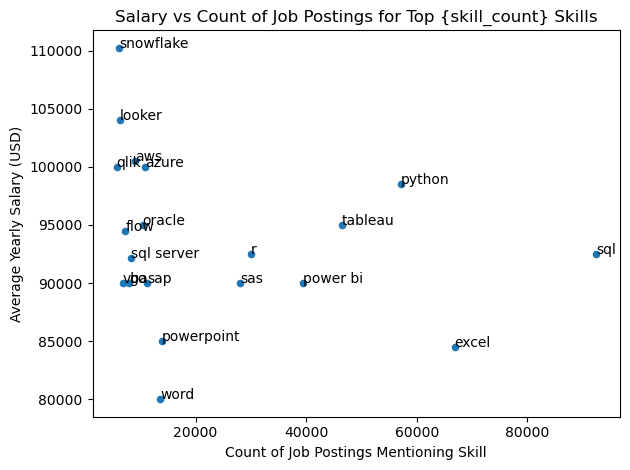

In [73]:
# plot the scatter plot

skills_stat.plot(kind="scatter", x="skill_count", y="median_salary")

for i, txt in enumerate(skills_stat.index):
    print(i, txt)
    plt.text(skills_stat["skill_count"].iloc[i], skills_stat["median_salary"].iloc[i], txt)

plt.xlabel("Count of Job Postings Mentioning Skill")
plt.ylabel("Average Yearly Salary (USD)")
plt.title("Salary vs Count of Job Postings for Top {skill_count} Skills")
plt.tight_layout()
plt.show()

0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap
10 azure
11 oracle
12 aws
13 sql server
14 go
15 flow
16 vba
17 looker
18 snowflake
19 qlik


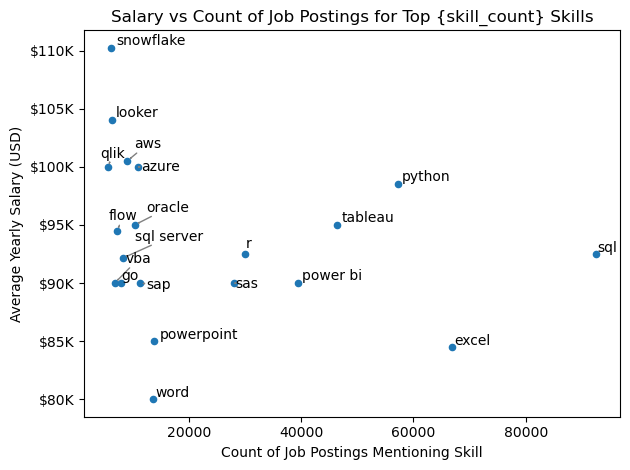

In [74]:
# it looks cramped! Text is overlapping - let's import the library that allows us to avoid this.
# We need to input a terminal command to import the library
    ##  Terminal window below
    ##  Access the right environment - conda activate Luke_Barousse_Python_Course
    ##  conda install adjustText

from adjustText import adjust_text

skills_stat.plot(kind="scatter", x="skill_count", y="median_salary")

# plot the chart and prepare texts for adjustText
texts =[]
for i, txt in enumerate(skills_stat.index):
    print(i, txt)
    texts.append(plt.text(skills_stat["skill_count"].iloc[i], skills_stat["median_salary"].iloc[i], txt))

# adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# set up x-axis formatting
ax = plt.gca() # gca = get current axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))

# Set axis labels, titel and legend
plt.xlabel("Count of Job Postings Mentioning Skill")
plt.ylabel("Average Yearly Salary (USD)")
plt.title("Salary vs Count of Job Postings for Top {skill_count} Skills")

# tight layout and display
plt.tight_layout()
plt.show()

## 16 Problems

## 2.16.1

Create a line plot showing the trend of job postings over the months for Cloud Engineer job postings:

- Create a new DataFrame called df_ce that filters only job postings that are 'Cloud Engineer'
- Customize the plot by setting the line style to dotted, the line color to purple, and the marker style to 'o'.
- Add a title 'Job Postings Trend for Cloud Engineers' and label the y-axis as 'Count of Job Postings'.

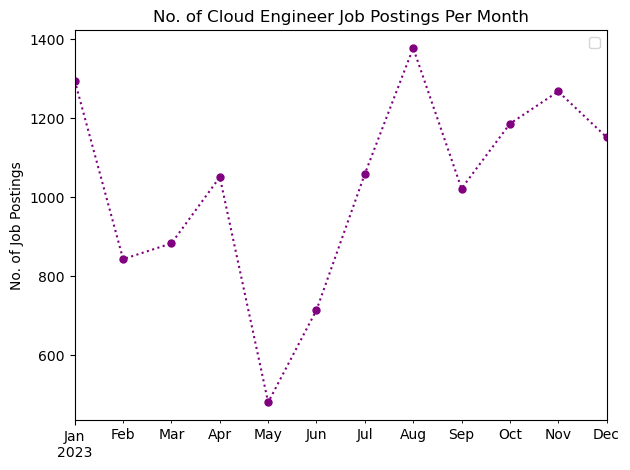

In [97]:
# new df
df_ce = df[df["job_title_short"] == "Cloud Engineer"].copy()

# create a new column for month no
df_ce["job_posted_month_no"] = df["job_posted_date"].dt.to_period("M")

# group by month
postings_per_month = df_ce.groupby("job_posted_month_no").agg(
    job_count =("job_posted_month_no", "count")
)

# plot the chart + format
postings_per_month.plot(
    kind="line",
    linestyle=":",
    color="purple",
    marker="o",
    markersize=5
)

# title + axes + tight layout + display
plt.title("No. of Cloud Engineer Job Postings Per Month")
plt.ylabel("No. of Job Postings")
plt.xlabel("")
plt.legend("")
plt.tight_layout()
plt.show()